Black Scholes Model:

In [1]:
import math
import numpy as np
import pandas as pd
import datetime
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
from scipy.stats import norm

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


[*********************100%%**********************]  6 of 6 completed


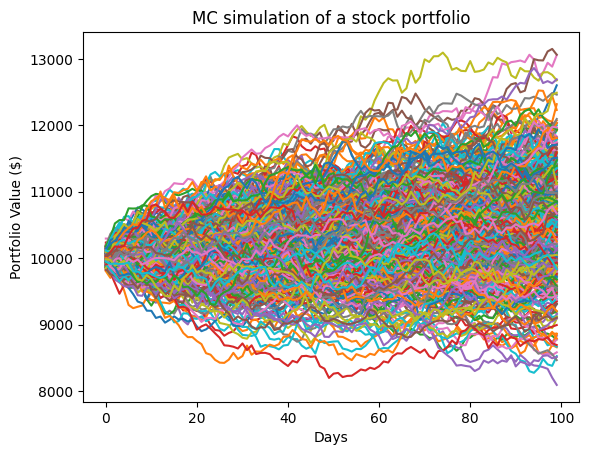

Var_5 $876.96
CVaR_5 $1219.56


In [2]:
def get_data(stocks, start, end):
    stockData = yf.download(stocks,start=start,end=end)['Close']
    returns = stockData.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix


stockList = ['CBA', 'BHP', 'TLS', 'NAB', 'WBC', 'STO']
stocks = [stock + '.AX' for stock in stockList] #Working on Australian stocks with the suffix AX
endDate = datetime.datetime.now()
startDate = endDate - datetime.timedelta(days=300)

meanReturns, covMatrix = get_data(stocks, startDate, endDate)

weights = np.random.random(len(meanReturns))
weights /= np.sum(weights)

mc_sims = 400 #number of simulations
T = 100 #timefframe in days

meanM = np.full(shape=(T, len(weights)), fill_value=meanReturns)
meanM = meanM.T

portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)

initialPortfolio = 10000

#Modelling the Portfolio's performance over time with a Monte Carlo Simulation
for m in range(0, mc_sims):
    Z = np.random.normal (size= (T, len(weights)))
    L = np.linalg.cholesky(covMatrix)
    dailyReturns = meanM + np.inner(L, Z)
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T) + 1) * initialPortfolio

plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('MC simulation of a stock portfolio')
plt.show()

def mcVaR (returns, alpha=5):
    if isinstance(returns, pd.Series):
        return np.percentile(returns, alpha)
    else:
        raise TypeError('Expected a pandas data series')

def mcCVaR(returns, alpha=5):
    if isinstance(returns, pd.Series):
        belowVaR = returns <= mcVaR(returns, alpha=alpha)
        return  returns[belowVaR].mean()
    else:
        raise TypeError('Expected a pandas data series')

portResults = pd.Series(portfolio_sims[-1,:])

VaR = initialPortfolio - mcVaR(portResults, alpha=5)
CVaR = initialPortfolio - mcCVaR(portResults, alpha=5)

print('Var_5 ${}'.format(round(VaR, 2)))
print( 'CVaR_5 ${}'.format(round(CVaR, 2)))


In [3]:
# Set a random seed for reproducibility
np.random.seed(1)

#Option Inputs:
S0= 100
T= 1
K= 101
r=0.06
sigma= 0.25
option_type= 'Call Option'

iterations= 100000


z=np.random.standard_normal(iterations)
ST= S0* np.exp((r-0.5*sigma**2)*T + sigma*np.sqrt(T)*z)
payoff= np.maximum(ST-K,0)
Call_price= np.exp(-r*T)*np.sum(payoff)/iterations


print( "Call price is: ", Call_price)

Call price is:  12.399179612517663


In [4]:
d1 = (np.log(S0/K) + (r + 0.5 * sigma**2) * T)/ ( sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

c = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
print( "Call price is :", c)

Call price is : 12.338502625639386


In [5]:
import numpy as np

# Inputs
S0 = 100  # Initial stock price
T = 6  # Time to maturity
K = 100  # Strike price
r = 0.0265  # Risk-free rate
sigma = 0.2  # Volatility
n_stocks = 10  # Number of stocks in the basket
iterations = 10000000  # Number of simulations
rho = 0.4  # Correlation coefficient

# Initialize the stock price matrix
ST = np.zeros((iterations, n_stocks))

# Generate correlated random variables using Cholesky decomposition
L = np.linalg.cholesky(np.full((n_stocks, n_stocks), rho) + np.diag(np.full(n_stocks, 1-rho)))
z = np.random.standard_normal((iterations, n_stocks))
z = np.dot(z, L.T)

# Simulate stock prices
for i in range(n_stocks):
    ST[:, i] = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * z[:, i])

# Calculate the payoff for the call option on the basket of stocks
basket_price = np.sum(ST, axis=1) / n_stocks  # Basket price is the average of all stocks
payoff = np.maximum(basket_price - K, 0)
Call_price = np.exp(-r * T) * np.sum(payoff) / iterations

print("Call price is: ", Call_price)



Call price is:  20.974710534470294


In [6]:
np.dot(L, L.T)

array([[1. , 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4],
       [0.4, 1. , 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4],
       [0.4, 0.4, 1. , 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4],
       [0.4, 0.4, 0.4, 1. , 0.4, 0.4, 0.4, 0.4, 0.4, 0.4],
       [0.4, 0.4, 0.4, 0.4, 1. , 0.4, 0.4, 0.4, 0.4, 0.4],
       [0.4, 0.4, 0.4, 0.4, 0.4, 1. , 0.4, 0.4, 0.4, 0.4],
       [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 1. , 0.4, 0.4, 0.4],
       [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 1. , 0.4, 0.4],
       [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 1. , 0.4],
       [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 1. ]])

The Heston Model:

In [8]:
import seaborn as sns
import pandas as pd
import numpy as np
!pip install py_vollib_vectorized
from py_vollib_vectorized import vectorized_implied_volatility as implied_vol

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 6.5 MB/s eta 0:00:00
  Created wheel for py-vollib: filename=py_vollib-1.0.1-py3-none-any.whl size=62829 sha256=e08bb8619f9e7c510a52e11419dd431c89037a2972a7a0644838f42b2e04a7d7
  Stored in directory: /root/.cache/pip/wheels/84/0c/fc/b68506eda40cccaeb0013be550ba904d253ec90eae2b156052
  Created wheel for py-lets-be-rational: filename=py_lets_be_rational-1.0.1-py3-none-any.whl size=24451 sha256=9b60c19430f85e7cbcd1296a1af0f4f845b1602ef3f80782ea9e0a143ad769b4
  Stored in directory: /root/.cache/pip/wheels/32/d9/4f/360d4b0b9ec7c65583ec7c8e72fd2158c97ad04fbcb932891c
Successfully built py-vollib py-lets-be-rational


/usr/local/lib/python3.10/dist-packages/py_lets_be_rational/numba_helper.py:10: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  return jit(*jit_args, **jit_kwargs)(fun)


In [9]:
# Paremeters

# Simulation dependent
S0 = 1000.0              # asset Price
T = 1.0                  # time in years
r = 0.02                 # risk free rate
N = 252                  # number of trading days
M = 100000               # number of simulations

# Heston dependent
kappa = 3                # rate of mean reversion of variance under risk-neutral dynamics
theta = 0.20**2          # Long-term mean of variance under risk-neutral dynamics
v0 = 0.25**2             # intial variance under risk-neutral dynamics
rho = 0.7                # correlation between returns and variances under risk-neutral dynamics
sigma = 0.6              # volatility of volatility


In [10]:
def heston_model_sim (S0, v0, rho, kappa, theta, sigma, T, N, M):
    # Parameters initiaition
    dt = T/N
    mu = np.array([0,0])
    cov = np.array([[1,rho],
                   [rho,1]]) # to generate two random variable with variance = 1 and that are correlated with rho

    #arrays for storing prices and variances
    S = np.full(shape=(N+1,M), fill_value=S0)
    v = np.full(shape=(N+1,M), fill_value=v0)

    #sampling correlated brownian motions under risk-neutral dynamics
    Z = np.random.multivariate_normal(mu, cov, (N,M))

    for i in range(1,N+1):
        S[i] = S[i-1] * np.exp( (r - 0.5*v[i-1] )* dt+ np.sqrt(v[i-1]*dt)*Z[i-1,:,0])
        v[i] = np.maximum(v[i-1]+ kappa*(theta-v[i-1])*dt+ sigma*np.sqrt(v[i-1]*dt)*Z[i-1,:,1],0)
    return S, v

In [11]:
rho_p = 0.98
rho_n = -0.98

S_p,v_p = heston_model_sim(S0, v0, rho_p, kappa, theta, sigma, T, N, M)
S_n,v_n = heston_model_sim(S0, v0, rho_n, kappa, theta, sigma, T, N, M)

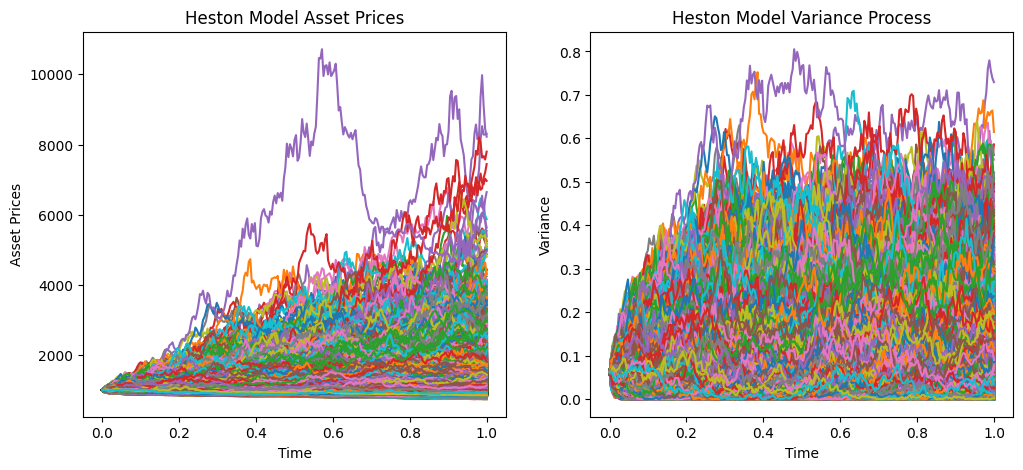

In [12]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize= (12,5))
time = np.linspace(0,T,N+1)
ax1.plot(time, S_p)
ax1.set_title('Heston Model Asset Prices')
ax1.set_xlabel('Time')
ax1.set_ylabel('Asset Prices')

ax2.plot(time, v_p)
ax2.set_title('Heston Model Variance Process')
ax2.set_xlabel('Time')
ax2.set_ylabel('Variance')

plt.show()

Asset price distribution with different correlations

In [13]:
# Simulate gbm process at time T
gbm = S0* np.exp( (r - theta**2/2)*T + np.sqrt(theta)* np.sqrt(T)*np.random.normal(0,1,M))

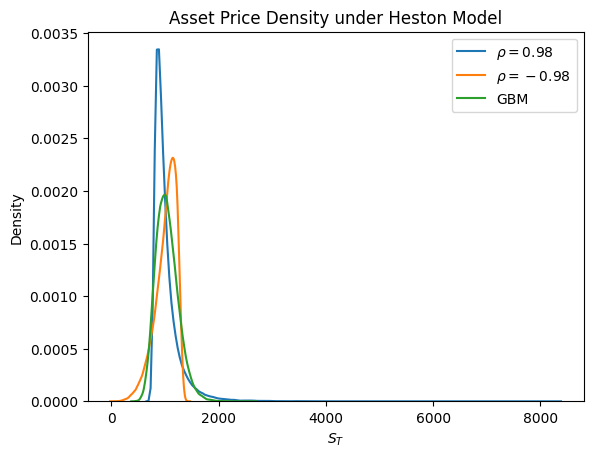

In [14]:
fig, ax= plt.subplots()

ax= sns.kdeplot(S_p[-1], label= r"$\rho= 0.98$" , ax=ax)
ax= sns.kdeplot(S_n[-1], label= r"$\rho= -0.98$" , ax=ax)
ax= sns.kdeplot(gbm, label= "GBM" , ax=ax)

plt.title(r'Asset Price Density under Heston Model')
plt.xlabel('$S_T$')
plt.ylabel('Density')
plt.legend()
plt.show()